## __Data Visualization with Seaborn__
Seaborn is a fantastic and easy to use Python Visualization which is built on Matplotlib.

### __Relational Plots__\
These kind of plots are used to analyze the relationship between features.

* Scatter Plots
* Line Plots

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the datasets to be used in this lab

titanic = sns.load_dataset('titanic')
fmri = sns.load_dataset('fmri')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [3]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [4]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [5]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [6]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


### __Scatter Plots__
In order to visualize the relationship between between two numeric features, scatter plot can be a go to plot over other types.

We will use `sns.scatterplot(data, x, y, hue, style, palette, size, sizes, legend, markers...)` and also `sns.relplot()`.

<Axes: xlabel='age', ylabel='fare'>

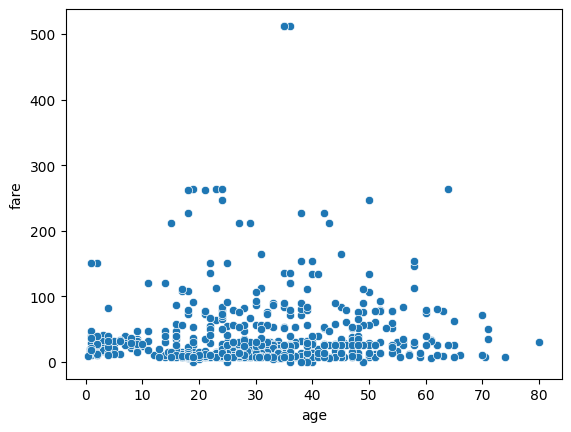

In [7]:
sns.scatterplot(data=titanic, x='age', y='fare')

With `hue` parameter, we can map another feature to the plot.

<Axes: xlabel='age', ylabel='fare'>

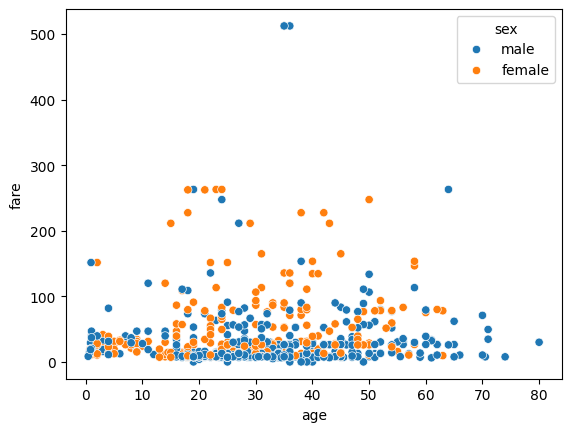

In [8]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

You can see it makes the plots more clear. In terms of this titanic dataset, you can directly identify that women paid high fare than men.

To also highlight the difference between the `hue classes`, we can add marker style as follows.

<Axes: xlabel='age', ylabel='fare'>

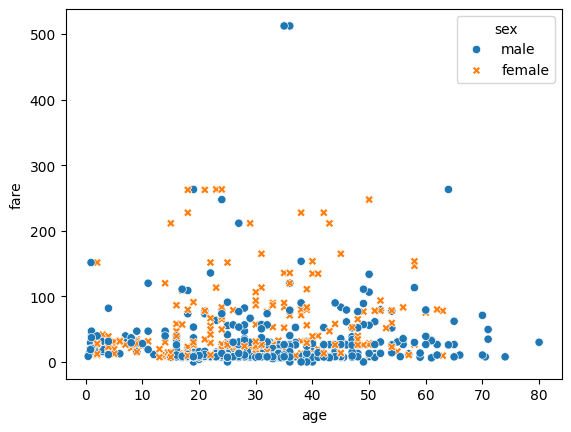

In [9]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='sex')

Increasing the figure size...

<Axes: xlabel='age', ylabel='fare'>

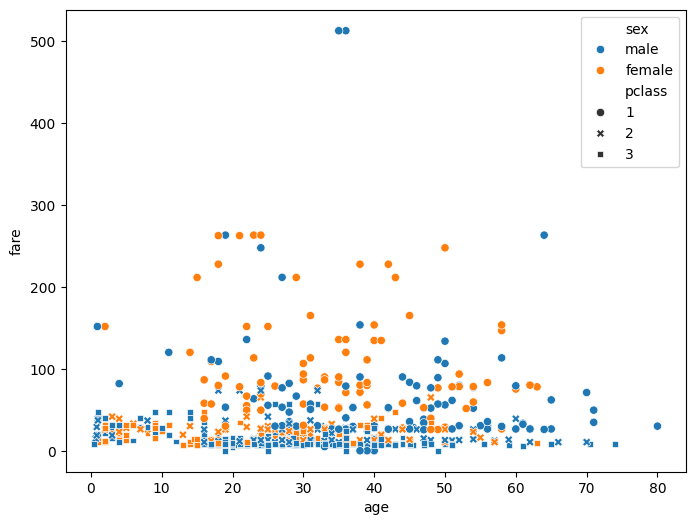

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass')

You can also use specific markers with `style` and `markers` paremeters.

<Axes: xlabel='age', ylabel='fare'>

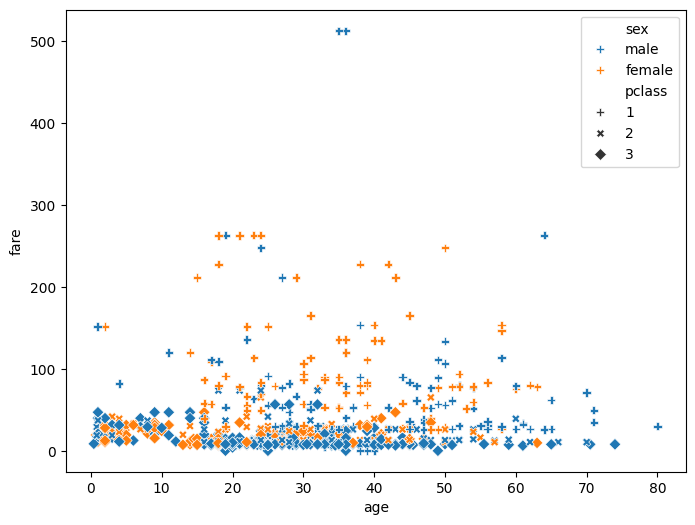

In [11]:
plt.figure(figsize=(8,6))

markers = {1:'P', 2:'X', 3:'D'} # P, X, and D are markers
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass', markers=markers)

Adding same feature on `hue` to `size` will make the plot more meaninfgul. `sizes` will control the range of marker areas of `size`. The

<Axes: xlabel='age', ylabel='fare'>

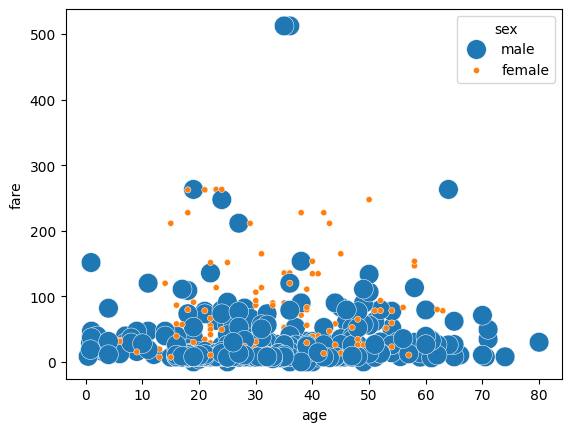

In [12]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', size='sex', sizes=(20,200))

<Axes: xlabel='age', ylabel='fare'>

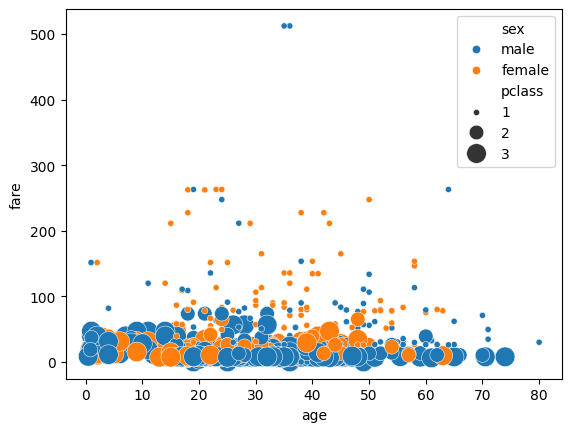

In [13]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', size='pclass', sizes=(20,200))

__Line Plots__\
Line plots are used to analyze the changes in one variable with respect to other variable such as time. An example, say you want to see the daily changes in revenues everyday.

Data visualization is an art. We will see more visualization types but always, there is no viz type that is going to be fit all. It is always good to consider the audience and the goal of the analysis.

To make line plot in Seaborn, we will use `sns.relplot()`, the kind parameter being `line`. You can make a scatter plots by changing the `kind` to `scatter`.

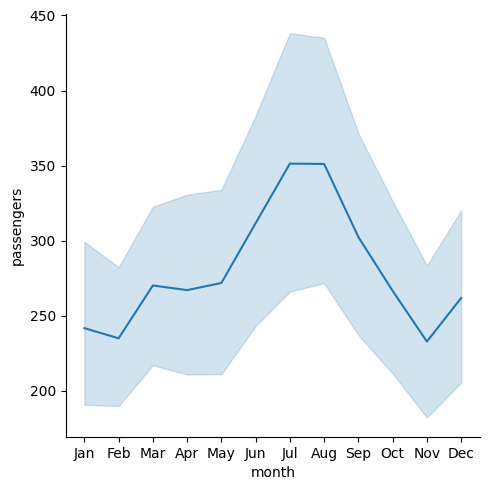

In [14]:
sns.relplot(data=flights, x='month', y='passengers', kind='line')

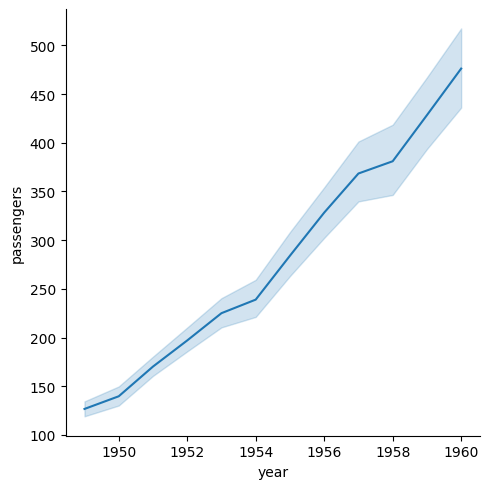

In [15]:
sns.relplot(data=flights, x='year', y='passengers', kind='line')

You can remove the confidence intervals by setting parameter `ci=None`. Setting `ci=sd` will instead show standard deviation and that can be useful sometime.

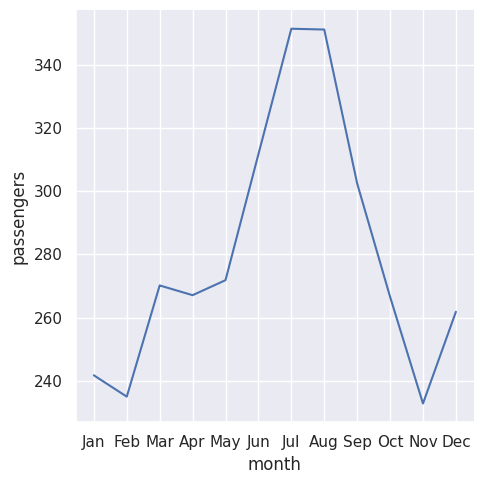

In [16]:
import warnings
warnings.filterwarnings(action='ignore')
sns.set_theme(style="darkgrid") #setting the grid for all next plots

sns.relplot(data=flights, x='month', y='passengers', ci=None, kind='line')

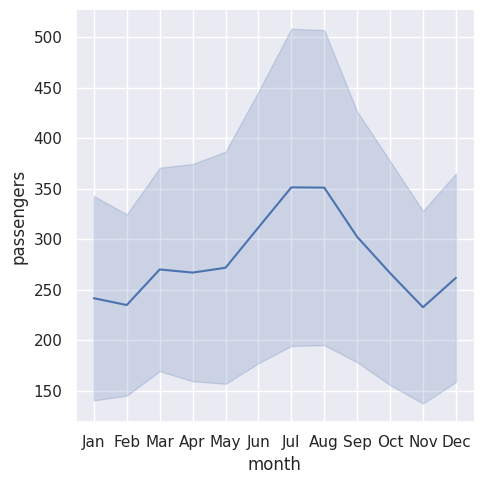

In [17]:
sns.relplot(data=flights, x='month', y='passengers', ci='sd', kind='line')

By default, `relplot` will aggregate the values on y axis in accordance to x axis. You can get rid of it by settng `estimator=None`.

* `ci=None`:\
This argument controls the display of confidence intervals. Setting it to `None` disables the calculation and plotting of confidence intervals around the line. By default, `relplot` with `kind='line'` would typically show a bootstrapped 95% confidence interval.
* `estimator=None`:\
This argument determines how multiple y-values for the same x-value are aggregated. When `estimator=None`, no aggregation is performed, and each individual data point is plotted. If there are multiple 'passengers' values for a given 'month', each will be represented, potentially leading to multiple lines or a less clear trend if not combined with other grouping variables. By default, `relplot` with `kind='line'` uses `estimator='mean'`, which would plot the mean 'passengers' for each 'month'.

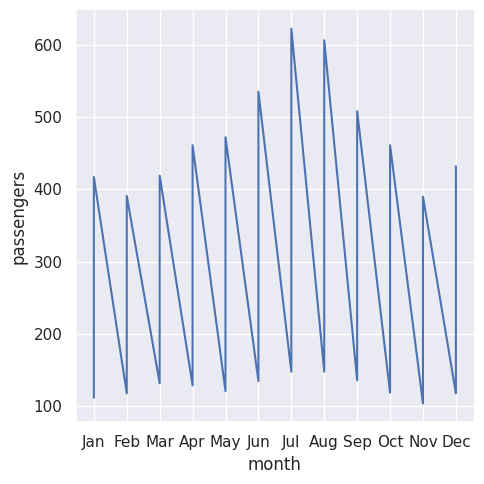

In [18]:
sns.relplot(data=flights, x='month', y='passengers', ci=None, estimator=None, kind='line')

You can add multiple lines....

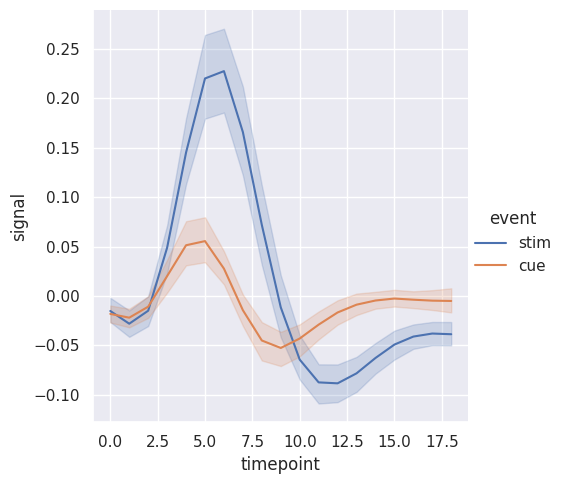

In [19]:
sns.relplot(data=fmri, x='timepoint', y='signal', 
            hue='event', kind='line')

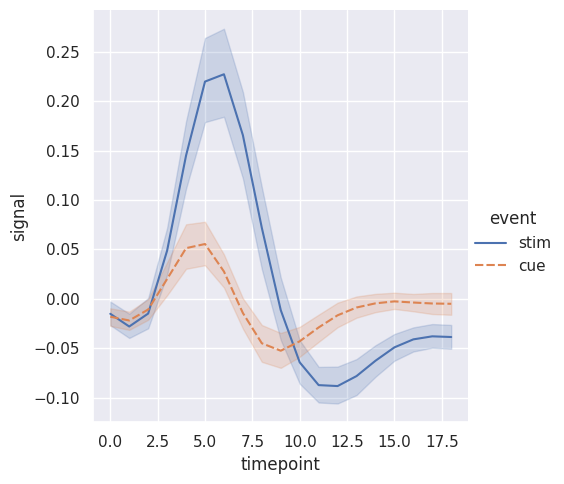

In [20]:
sns.relplot(data=fmri, x='timepoint', y='signal', 
            hue='event', kind='line', style='event')

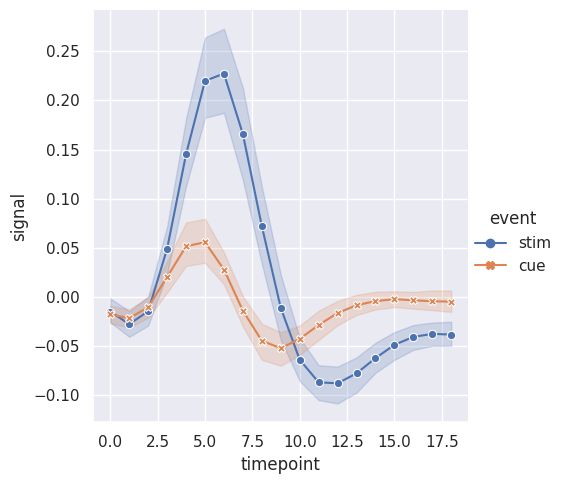

In [21]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line', 
            style='event', dashes=False, markers=True)

Showing multiple relationships

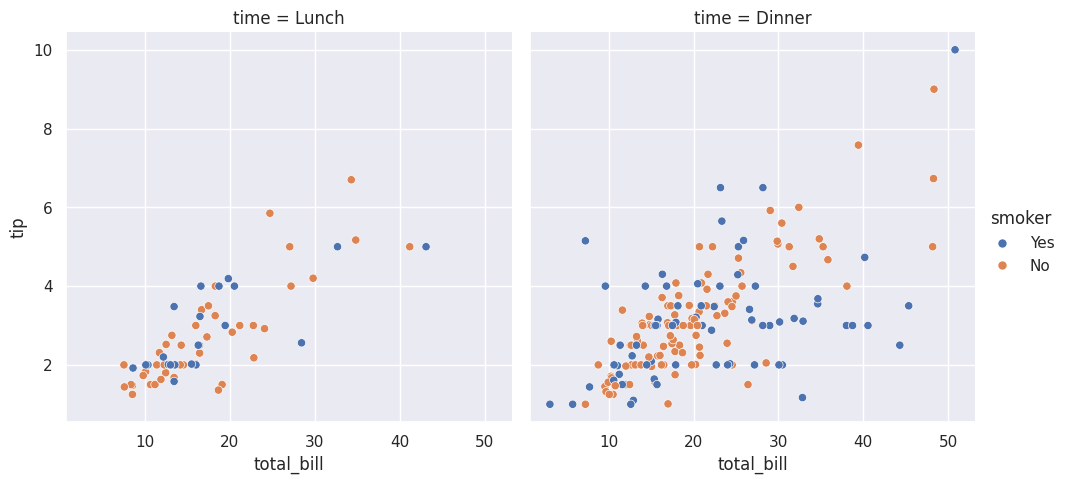

In [22]:
sns.relplot(x='total_bill', y='tip', hue='smoker',
            col='time', data=tips);

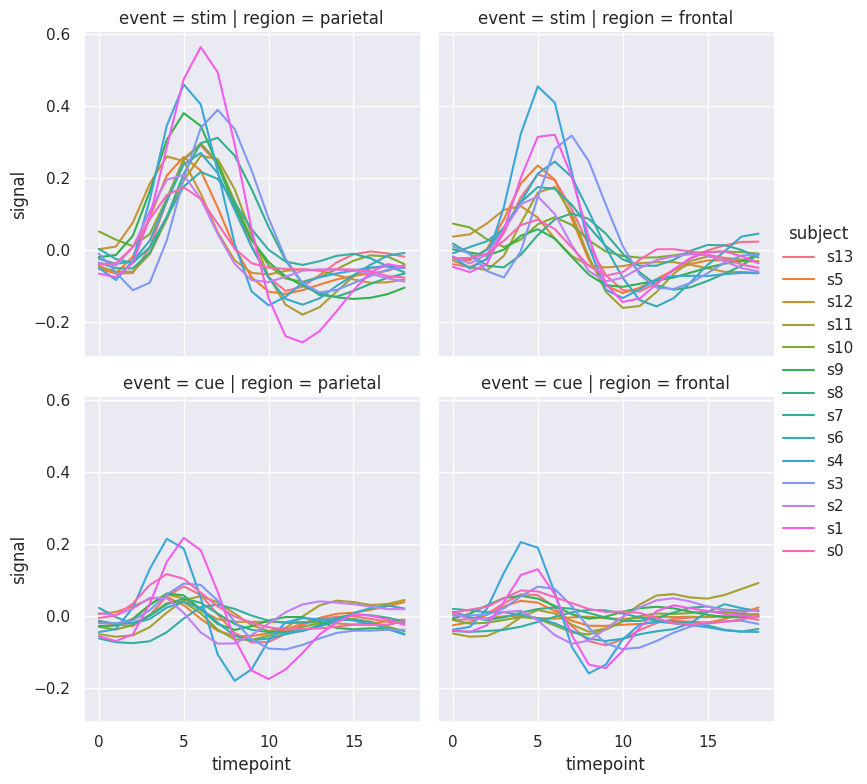

In [23]:
sns.relplot(x='timepoint', y='signal', hue='subject',
           col='region', row='event', height=4,
           kind='line', estimator=None, data=fmri)

### __Distribution Plots__
These kind of plots are used to visualize the distribution of the features. Understanding how your data is distributed can help you to determine the range of values, their central tendency, or if they maybe inclined in one direction and also spotting outliers.

Distribution plots functions:

* displot()
* jointplot()
* pairplot()
* rugplot()
* kdeplot

__Plotting Histograms with displot() and histplot()__\
Histogram is a bar plot whose x-axis is a variable or a feature and y-axis being the count of values of that particular variable. By default, displot() plots the histogram.

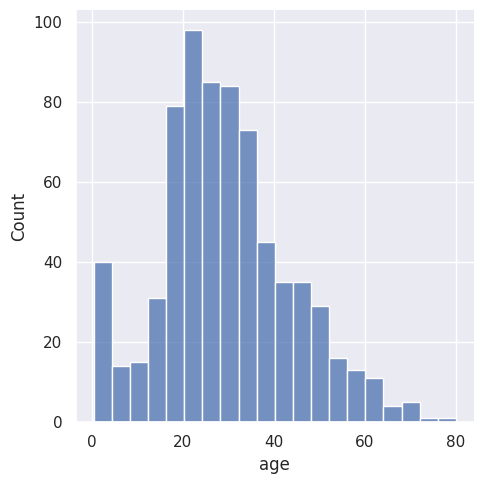

In [24]:
sns.displot(titanic['age'])

By default, *Kernel Density Estimator(KDE)* is True. By setting it off, we should remain with the histograms. A histogram displays data by grouping data into bins. We can set the `bins` to a value of choice.

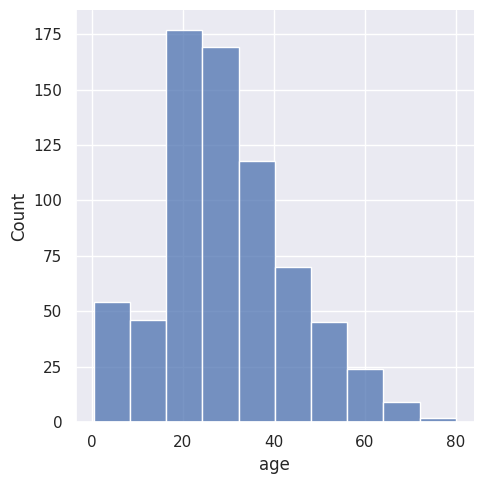

In [25]:
sns.displot(titanic['age'], kde=False, bins=10)

We can also plot categorical data on histograms.

<Axes: xlabel='day', ylabel='Count'>

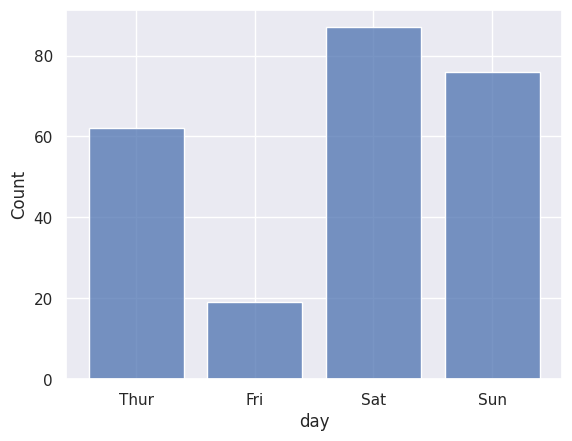

In [26]:
sns.histplot(tips, x='day', shrink=.8)

 The `shrink` parameter reduces the width of the bars by a proportion of the default bin width. A value of `.8` means each bar will be 80% of its normal width, adding a visual gap between the bars. This is particularly useful for categorical data to emphasize that the bars represent distinct, separate categories rather than a continuous range.

__`sns.displot()`__: This is a figure-level function in Seaborn for drawing distribution plots. Unlike axis-level functions like sns.histplot(), displot() creates a figure with subplots, which allows for more complex layouts using parameters like row, col, and hue. By default, displot() draws a histogram (kind='hist').

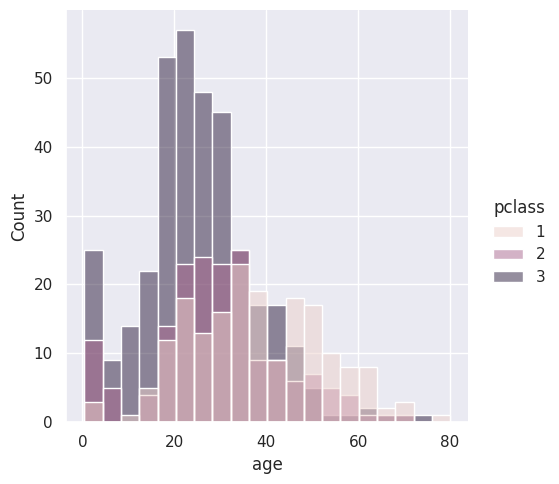

In [27]:
sns.displot(titanic, x='age',hue='pclass')

<Axes: xlabel='age', ylabel='Count'>

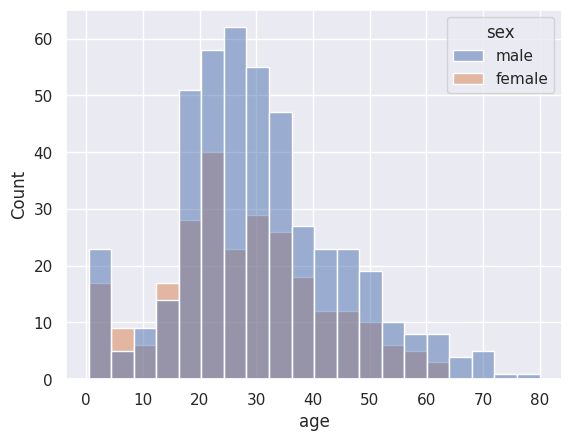

In [28]:
sns.histplot(titanic, x="age",hue="sex")

<Axes: xlabel='age', ylabel='Count'>

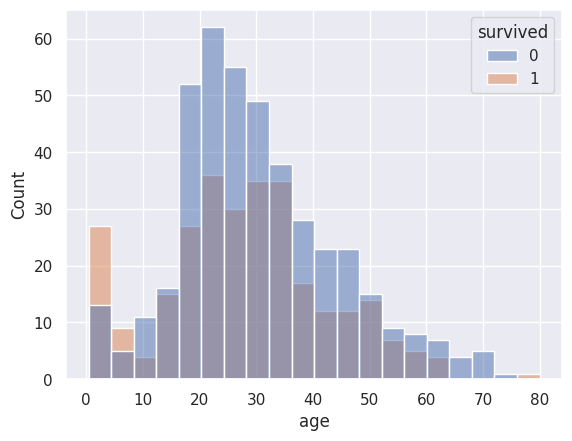

In [29]:
sns.histplot(titanic, x="age",hue="survived")

We can also make stacked bars by setting the parameter `multiple='stack'`.\
__`multiple='stack'`__: This parameter controls how the multiple distributions are displayed. Instead of plotting the different classes on top of each other (the default 'layer'), this setting stacks the bars. For each age bin, the bars for 1st, 2nd, and 3rd class are stacked vertically, with each class having a distinct color based on the hue parameter.

<Axes: xlabel='age', ylabel='Count'>

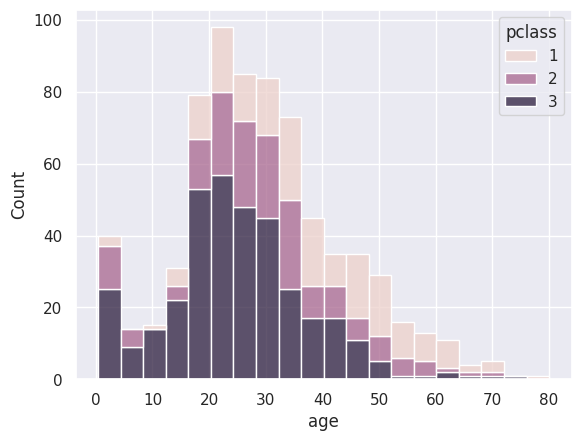

In [30]:
sns.histplot(titanic, x='age',hue='pclass', multiple='stack')

__Plotting Bivariate Data with Jointplot()__\
We use jointplot() to plot two variables with bivariate and univariate graphs. We can have the following options in kind: `scatter`, `reg`, `resid`, `kde`, `hex`. The default kind is `scatter`.

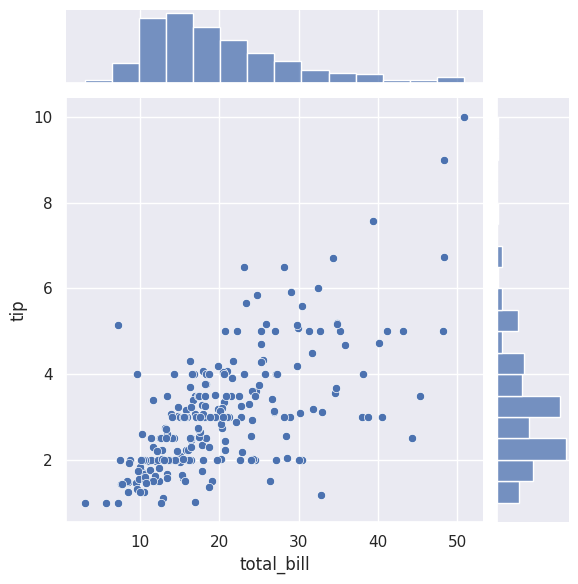

In [31]:
sns.jointplot(data=tips, x='total_bill', y='tip')

_The output is a grid of three plots:_
* Main (Joint) Plot: In the center, a scatter plot is shown, which visualizes the relationship between the `total_bill` (on the x-axis) and the `tip` (on the y-axis). Each dot represents a single dining party, showing the total cost of their meal and the tip they left.
* Top (Marginal) Plot: Above the scatter plot, a histogram is displayed, showing the distribution of the `total_bill` variable. This lets you see the frequency of different total bill amounts.
* Right (Marginal) Plot: To the right of the scatter plot, another histogram is shown, oriented vertically. This visualizes the distribution of the `tip` variable, letting you see the frequency of different tip amounts.

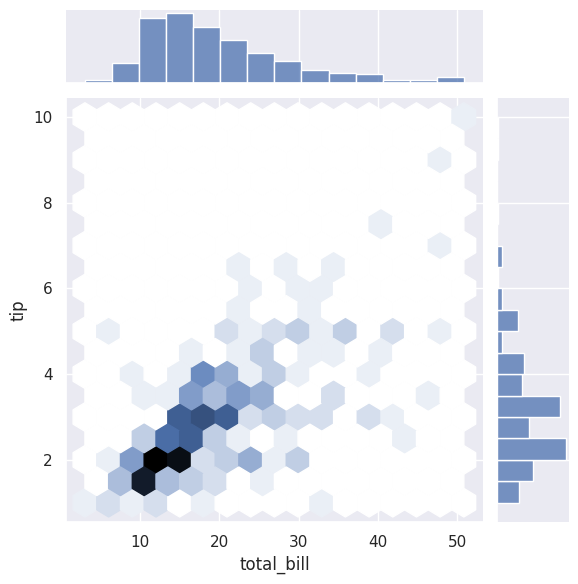

In [32]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

`kind='kde'` specifies that the plot should use Kernel Density Estimation to visualize the data distribution. This produces a smooth, continuous probability density curve rather than the discrete bins of a histogram.

__How KDE works__
Instead of counting data points that fall into discrete bins (like a histogram), KDE works by placing a "kernel," which is a smoothing function (most commonly a Gaussian bell curve), over each individual data point. 
* Kernels: For each data point in the dataset, a small probability distribution (the kernel) is placed at that point's location.
* Summation: All the individual kernels are then summed together to create a single, continuous, and smoothed curve that represents the overall probability density of the data.
* Bandwidth: The bandwidth is a crucial parameter that controls the width of the individual kernels.
    1. Small bandwidth: Results in a spiky, less smoothed curve that might overfit to the noise in the data.
    2. Large bandwidth: Produces a very smooth, generalized curve that might hide important details and structure.

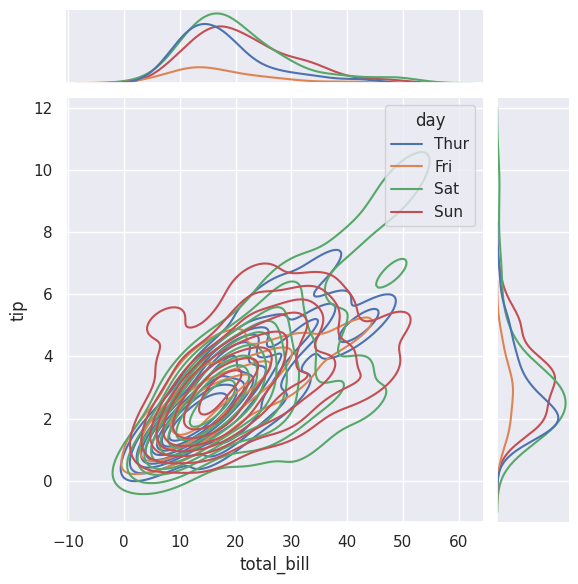

In [33]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', hue='day')

`kind='reg'` specifies that the plot should visualize a _linear regression model_ fit. This is useful for exploring the linear relationship between two continuous variables.

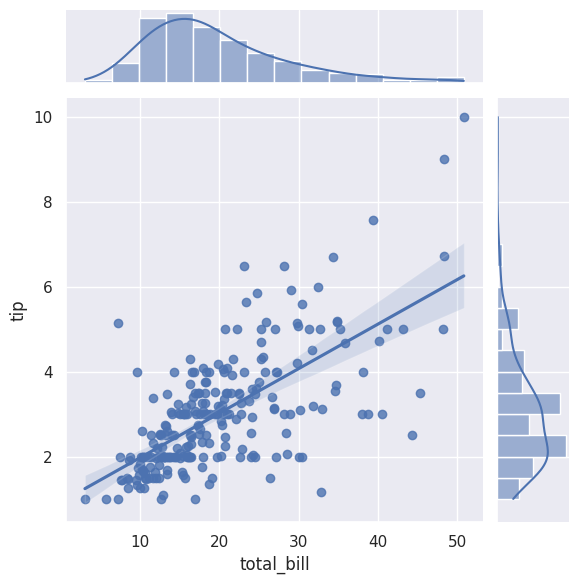

In [34]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

`kind='resid'` parameter creates a residual plot. This is a diagnostic plot used to assess the appropriateness of a simple linear regression model by visualizing its errors.\
__What is a residual?__\
A residual is the vertical distance between a data point and the regression line fitted to the data. 
* It is calculated as: \
    `(Residual=Actual Y-Predicted Y)`.
* Positive residuals mean the model underestimated the actual value.
* Negative residuals mean the model overestimated the actual value.
* A residual of zero means the model predicted the data point perfectly.

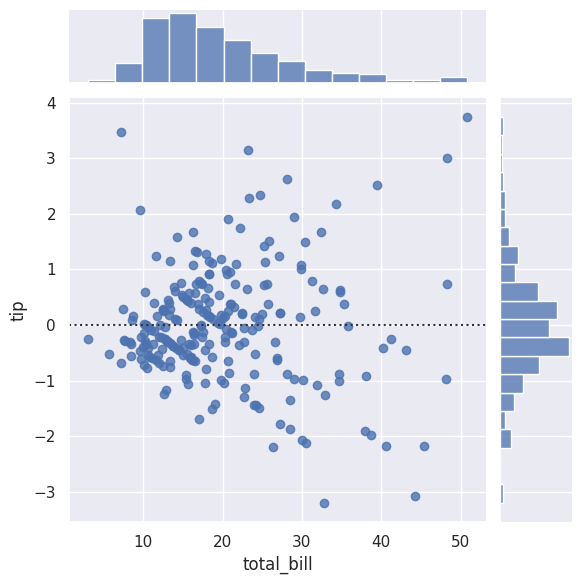

In [35]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='resid')

__Plotting Many Distribution with pairplot()__\
`pairplot()` visualize all possible distributions of variables in datasets. This is a cool plot, you can immmediately see relationships between features.

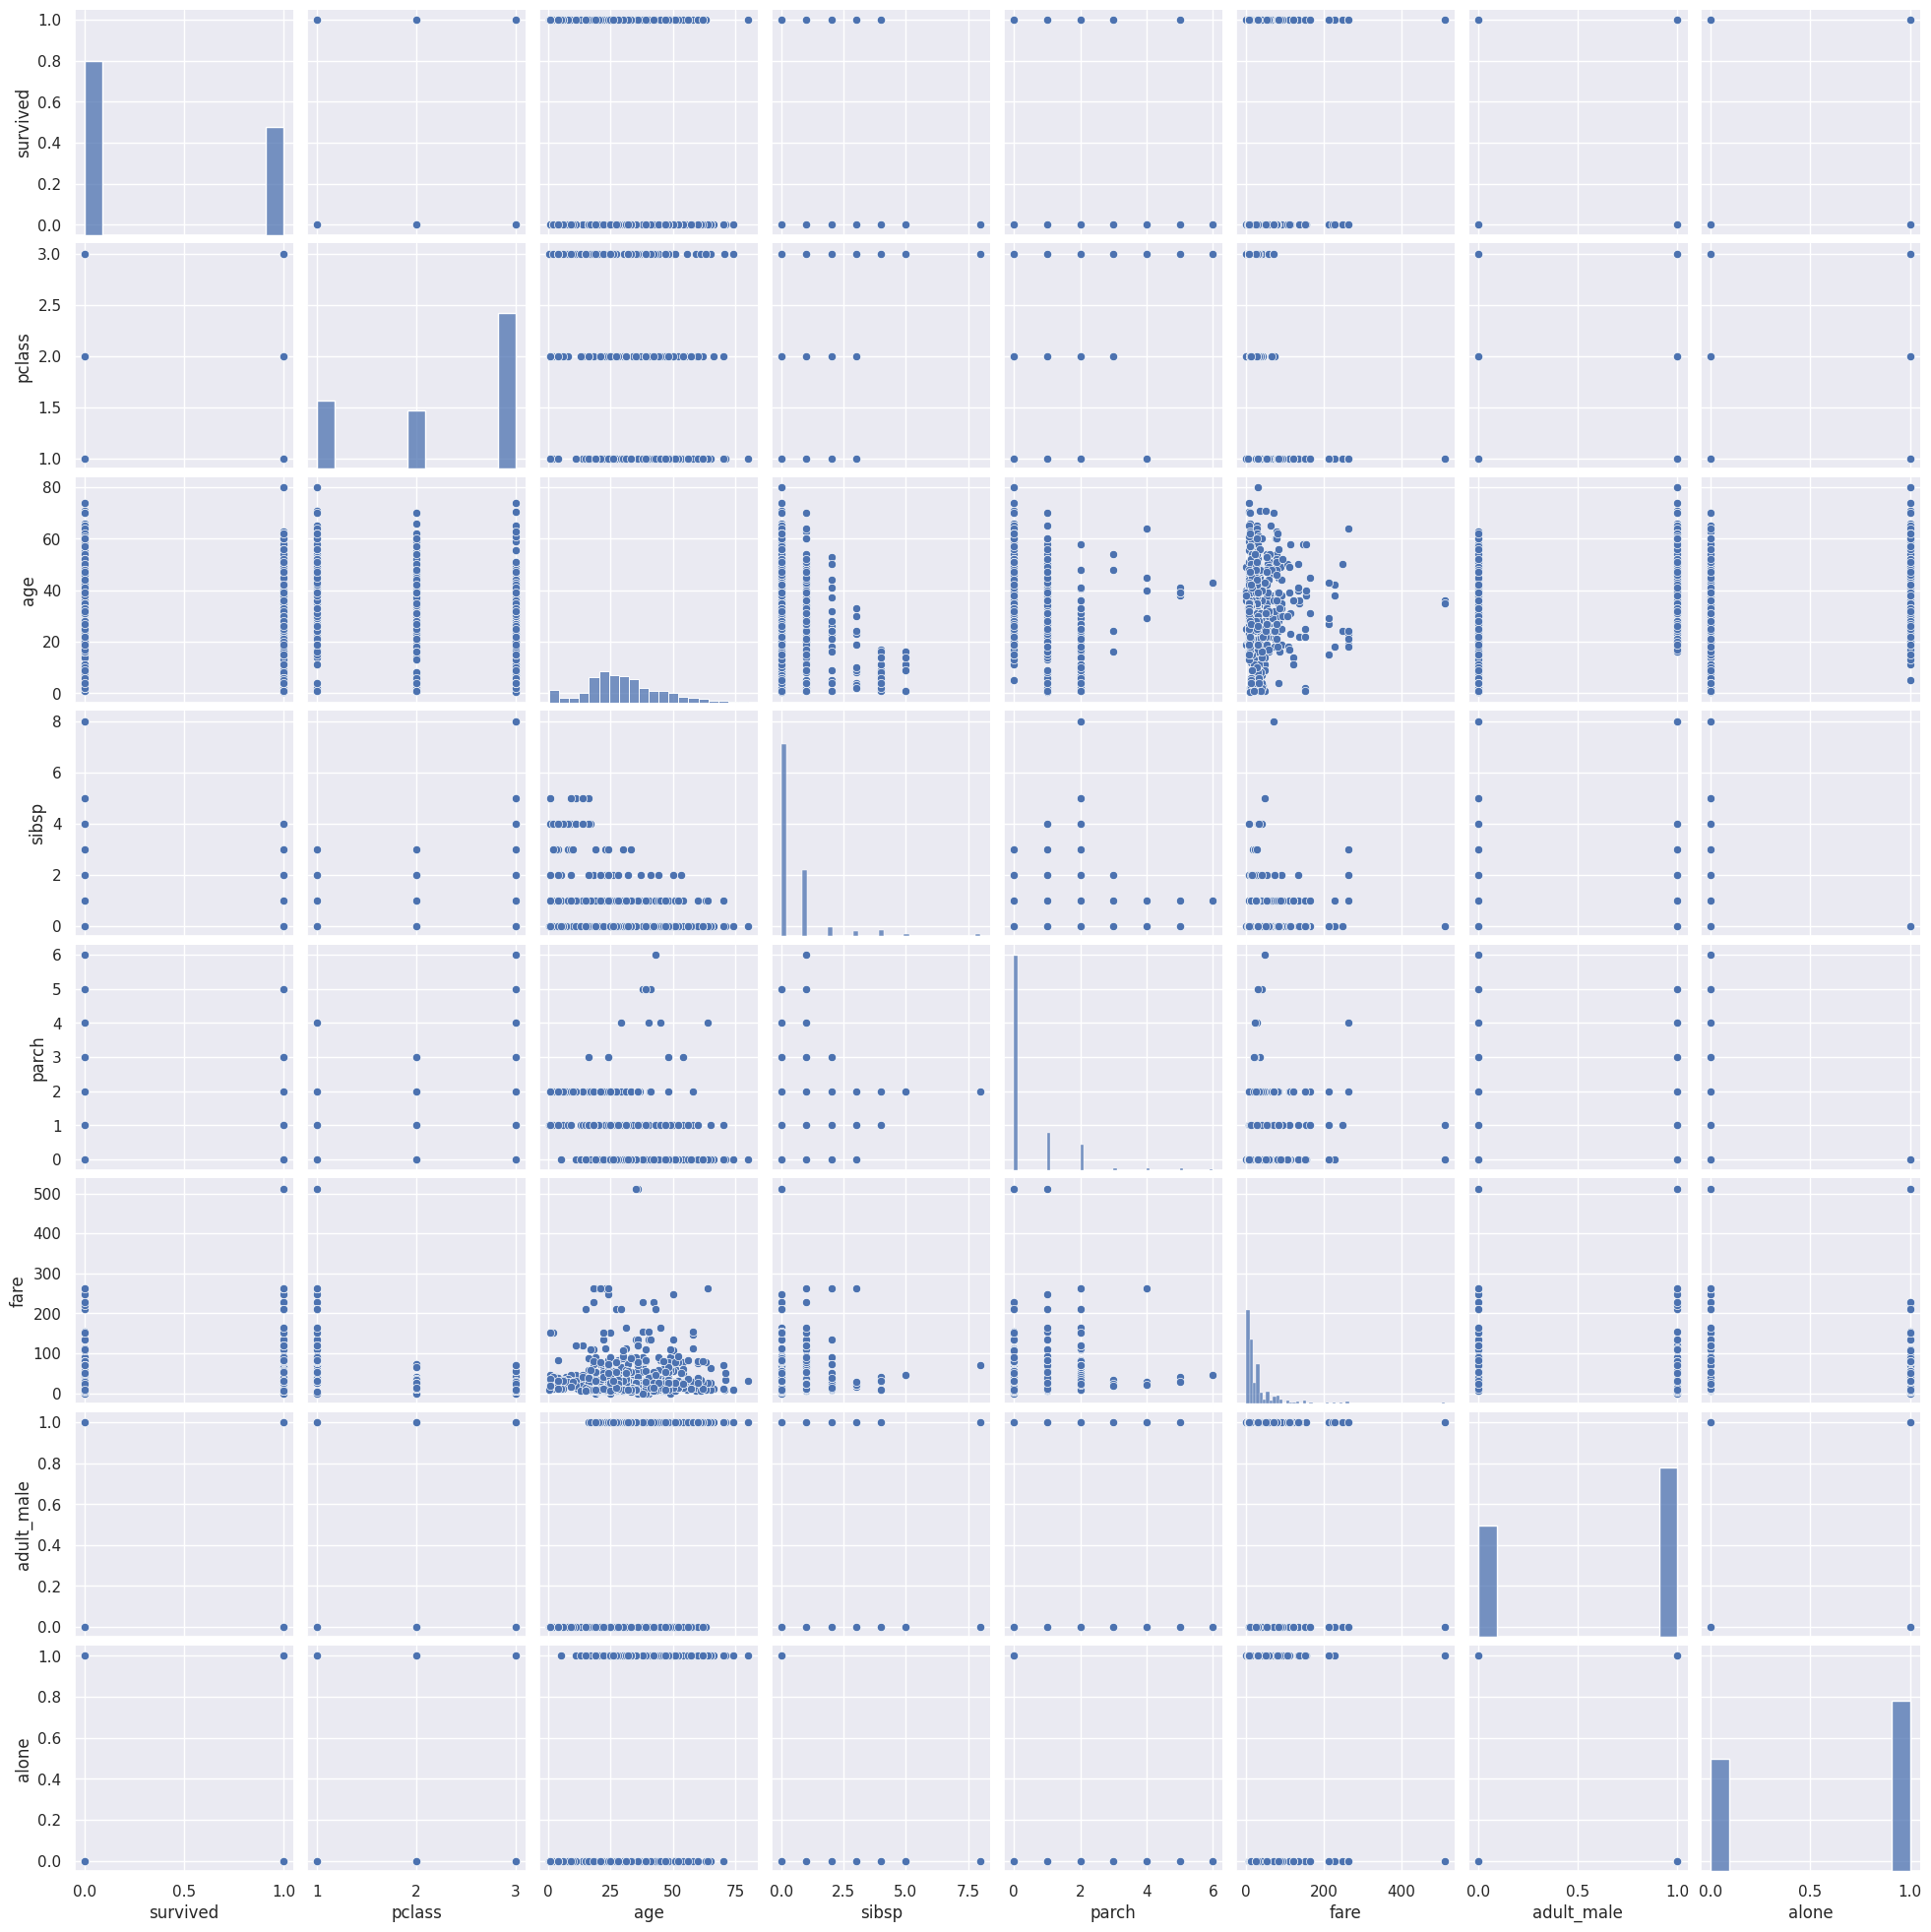

In [36]:
sns.pairplot(titanic)

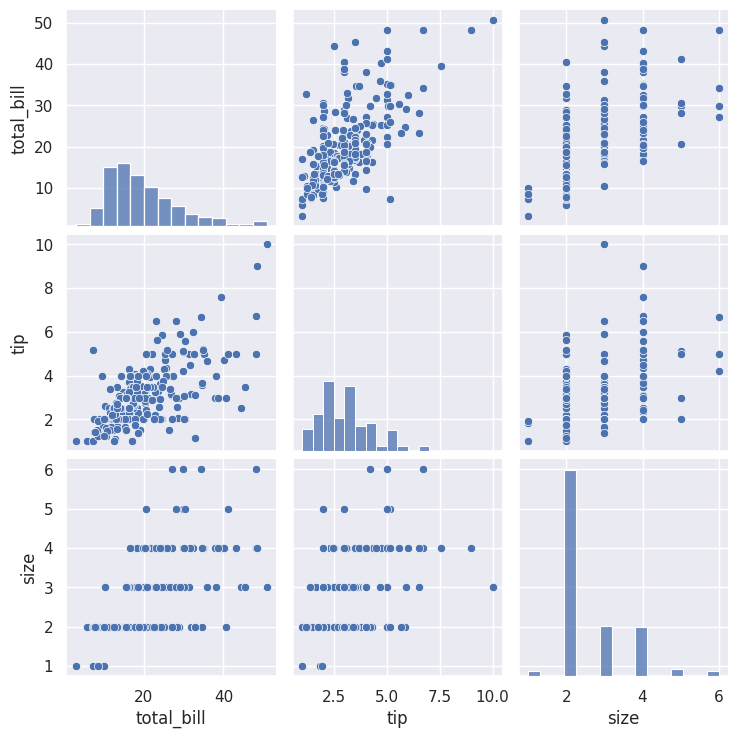

In [37]:
sns.pairplot(tips)

__Plotting Distributions with rugplot()__\
`rugplot()` plot marginal distributions by drawing `ticks` or `dash` along the `x` and `y` axis of the univariate variable.

<Axes: xlabel='total_bill', ylabel='tip'>

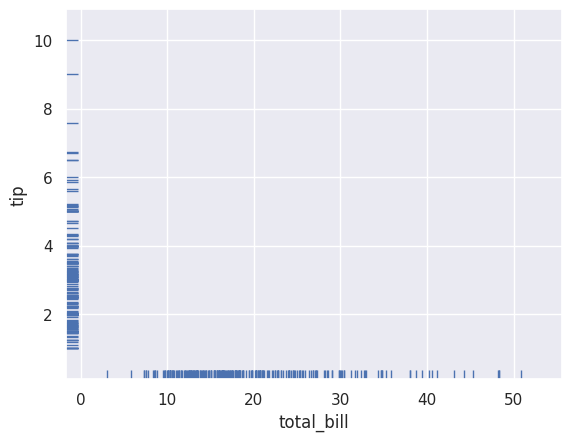

In [38]:
sns.rugplot(data=tips, x='total_bill', y='tip')

Combining `relplot()` and `rugplot` in one figure...

<Axes: xlabel='total_bill', ylabel='tip'>

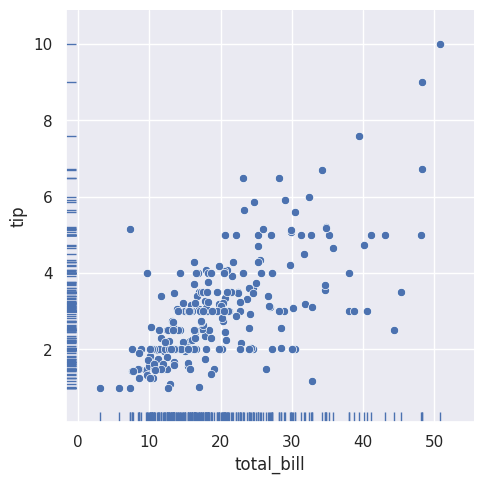

In [39]:
sns.relplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

### __Kernel Density Estimation (KDE) Plot with kdeplot() and displot()__
We can visualize the probability density of a variable. Different to histogram which shows the counts, KDE plot smooths the visualization with a Guassian kernel.

<Axes: xlabel='tip', ylabel='Density'>

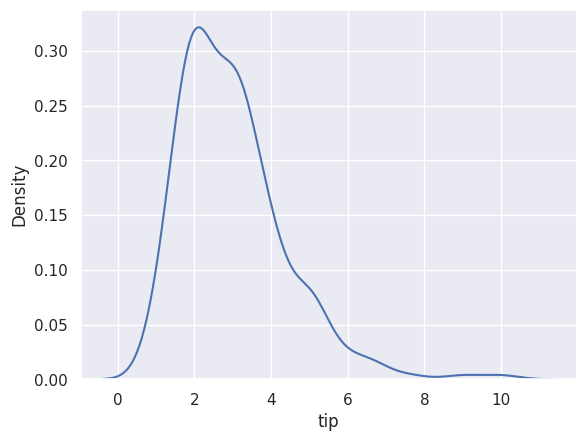

In [40]:
sns.kdeplot(data=tips, x='tip')

<Axes: xlabel='tip', ylabel='Density'>

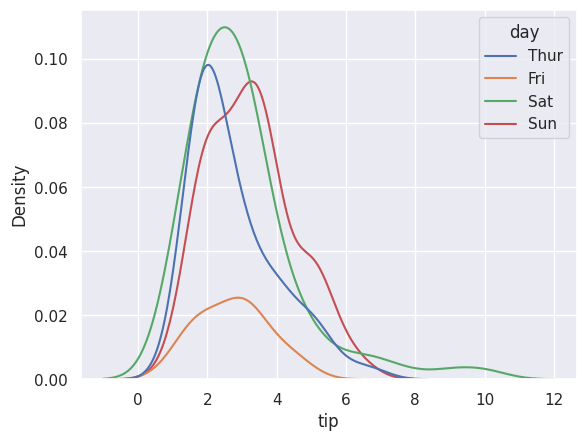

In [41]:
sns.kdeplot(data=tips, x='tip', hue='day')

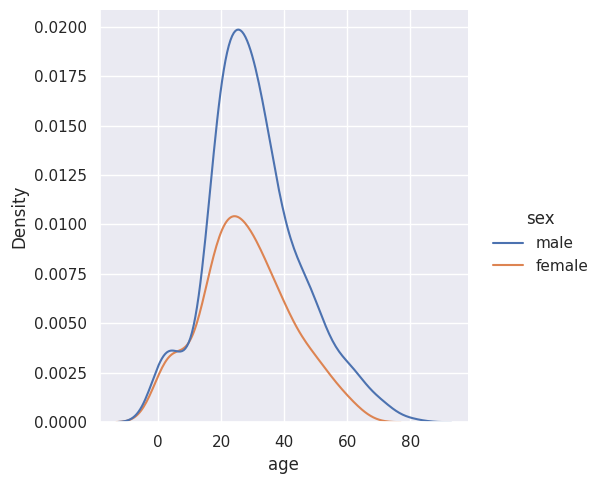

In [42]:
sns.displot(titanic,x='age', kind='kde', hue='sex')

<Axes: xlabel='tip', ylabel='Density'>

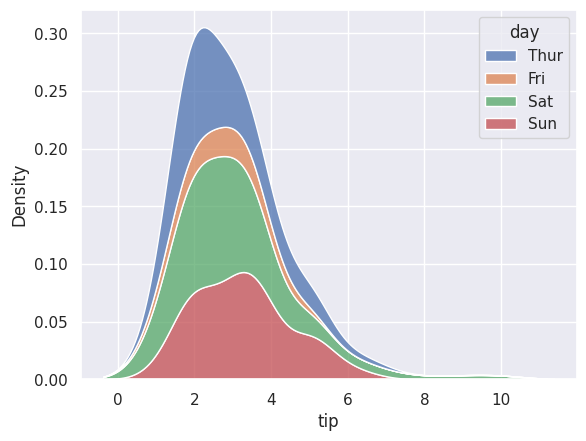

In [43]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack')

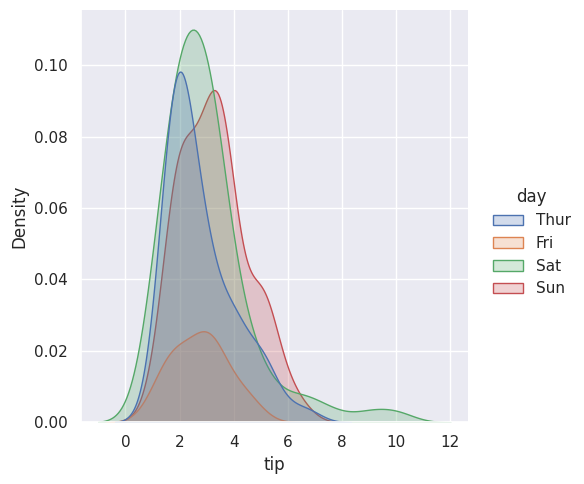

In [44]:
sns.displot(data=tips, x='tip', hue='day', kind='kde', fill=True)

Whether you use `displot()` or `kdeplot()`, you can see they are very handy in visualizing the density distributions.

### __Cumulative Distributions__
There are times we would like to visualize the cumulative distributions. By setting kind parameter in `displot()` to `ecdf`, we can plot the cumulative or increasing curve of an univariate variable.

ecdf stands for `empirical cumulative distribution function`

(ECDF) is a non-parametric statistical tool used to visualize and analyze the distribution of a dataset. It is a step-function plot that shows the proportion of data points that are less than or equal to a given value.

_What an ECDF plot shows and how to interpret it ?_
An ECDF plot provides a powerful way to understand data characteristics. 
> Key features and their meaning
* `The plot's shape`:
    1. _Steep segments_: Indicate a high concentration of data points within that range of values. The plot rises quickly in these areas.\
    2. _Flat segments_: Represent a gap in the data, where no observations were found. The function remains constant.\
    3. _S-shaped curve_: For many distributions like the normal distribution, the ECDF will form a characteristic "S" curve.
* `Reading percentiles`: The ECDF makes it easy to find the percentile of any value in the dataset. To find the 50th percentile (the median), for instance, you find 0.5 on the y-axis and see which x-value it corresponds to.
* `Comparing distributions`: By overlaying multiple ECDF plots on the same axes (e.g., using hue in Seaborn), you can visually compare the distributions of different groups.
A plot that is consistently to the left of another indicates that the first group generally has smaller values.
* `Spotting outliers`: Outliers appear as values on the x-axis far from where the plot's main steps occur. ECDFs handle them gracefully, unlike histograms, which can be distorted by their presence. 

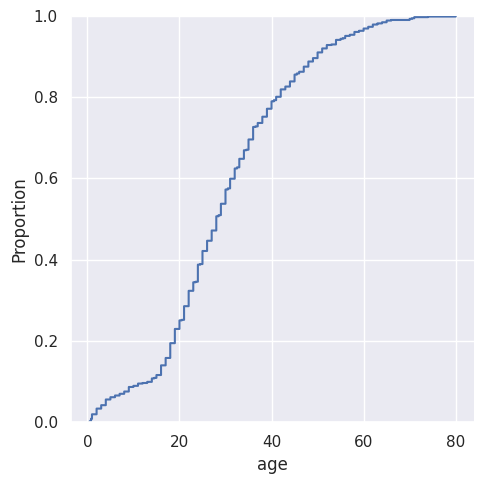

In [45]:
sns.displot(titanic, x='age', kind='ecdf')